In [1]:
from DataGenerator import TimeSeriesGenerator, suddenDrift, generateSeasonality, generateTrend, incrementalDrift
from conditions import scenarios
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from grouped_series import ExperimentTracker    
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from TimeSeriesGradientBoosting import TimeSeriesGradientBoosting
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression

In [2]:
onehot1 = ColumnTransformer([('one_hot_encoder', OneHotEncoder(
), make_column_selector(dtype_include=object))], remainder=StandardScaler())

onehot2 = ColumnTransformer([('one_hot_encoder', OneHotEncoder(
), make_column_selector(dtype_include=object))], remainder=StandardScaler())

hybrid_vars = [0,1, 2, 3, 4, 5, 6, 7, -3, -2, -1]
hybrid_model = TimeSeriesGradientBoosting(model1 = LinearRegression(), model2 = XGBRegressor(), model1_variables = hybrid_vars)

hybrid_xgb_pipe = Pipeline([
    ('preprocessor', onehot1),
    ('regressor', hybrid_model)
])

sgd_pipe = Pipeline([
    ('preprocessor', onehot2),
    ('regressor', SGDRegressor())
])

In [3]:
def full_run():
    products = []
    customers = []
    for i in range(2):
        product = TimeSeriesGenerator(size=365, amountOfVariables=7)
        customer = TimeSeriesGenerator(size=365, amountOfVariables=3)
        products.append(product)
        customers.append(customer)
    thesis = ExperimentTracker(products, customers, scenarios())
    thesis.runExperiment(algorithms=[hybrid_xgb_pipe, sgd_pipe], algorithm_name=["Gradient boosted decision tree", "Linear regression"], online=[False, False])
    return thesis


In [ ]:
thesis = full_run()

Finished experiment! Elapsed time: 0.4864339828491211, total Elapsed time: 0.4864339828491211, Algorithm: Gradient boosted decision tree Type: Sudden Drift, Dropped variables: None, magnitude: Small, Drift time: Fully observed, importance: Important
Finished experiment! Elapsed time: 0.5358285903930664, total Elapsed time: 1.0232608318328857, Algorithm: Gradient boosted decision tree Type: Sudden Drift, Dropped variables: None, magnitude: Small, Drift time: Half observed, importance: Important
Finished experiment! Elapsed time: 0.5847246646881104, total Elapsed time: 1.607985496520996, Algorithm: Gradient boosted decision tree Type: Sudden Drift, Dropped variables: None, magnitude: Small, Drift time: Unobserved, importance: Important
Finished experiment! Elapsed time: 0.4810500144958496, total Elapsed time: 2.0890355110168457, Algorithm: Gradient boosted decision tree Type: Sudden Drift, Dropped variables: None, magnitude: Small, Drift time: Fully observed, importance: Medium
Finished 

In [5]:
results = thesis.resultsToDF()

NameError: name 'thesis' is not defined

In [ ]:
results[["Algorithm","SMAPE", "Drift type", "Drift time", "Drift magnitude"]].groupby(["Algorithm","Drift type", "Drift time", "Drift magnitude"]).aggregate(["mean", "std", "min", "max"])

SMAPE  \
                                                                                      mean   
Algorithm                      Drift type        Drift time     Drift magnitude              
Gradient boosted decision tree Incremental Drift Fully observed Large             5.065833   
                                                                Small             2.549167   
                                                 Half observed  Large            11.171667   
                                                                Small             3.412500   
                                                 Unobserved     Large             9.271667   
                                                                Small             3.180833   
                               No Drift          No Drift       No Drift          2.057500   
                               Sudden Drift      Fully observed Large             4.796667   
                                                                Small             2.480833   
                                                 Half observed  Large             7.669167   
                                                                Small             2.730000   
                                                 Unobserved     Large            12.588333   
                                                                Small             3.621667   
                               Sudden Shock      3 days         Large             2.560000   
                                                                Small             2.160000   
                                                 7 days         Large             2.645000   
                                                                Small             2.172500   
Linear regression              Incremental Drift Fully observed Large             3.538333   
                                                                Small             2.675833   
                                                 Half observed  Large            17.440000   
                                                                Small             4.706667   
                                                 Unobserved     Large            13.002500   
                                                                Small             4.375000   
                               No Drift          No Drift       No Drift          2.567500   
                               Sudden Drift      Fully observed Large             3.676667   
                                                                Small             2.715833   
                                                 Half observed  Large             4.459167   
                                                                Small             2.716667   
                                                 Unobserved     Large            18.776667   
                                                                Small             4.870000   
                               Sudden Shock      3 days         Large             2.725000   
                                                                Small             2.627500   
                                                 7 days         Large             2.700000   
                                                                Small             2.605000   

                                                                                           \
                                                                                      std   
Algorithm                      Drift type        Drift time     Drift magnitude             
Gradient boosted decision tree Incremental Drift Fully observed Large            2.016448   
                                                                Small            0.384695   
                                                 Half observed  Large            5.912887   
                                                

In [ ]:
results.sort_values("SMAPE", ascending=False)   

,Algorithm,Dropped variable,Drift type,Drift magnitude,Variable importance,Drift time,MSE,SMAPE
318,Linear regression,6.0,Incremental Drift,Large,Medium,Half observed,3989.357610,31.23
298,Linear regression,6.0,Sudden Drift,Large,Important,Unobserved,2908.873203,29.40
274,Linear regression,3.0,Incremental Drift,Large,Important,Half observed,3304.612637,27.70
257,Linear regression,3.0,Sudden Drift,Large,Important,Unobserved,2344.068765,25.93
219,Linear regression,0.0,Sudden Drift,Large,Medium,Unobserved,2227.529124,25.33
...,...,...,...,...,...,...,...,...
147,Gradient boosted decision tree,6.0,Incremental Drift,Small,Unimportant,Fully observed,19.400639,2.03
6,Gradient boosted decision tree,NaN,Sudden Drift,Small,Unimportant,Fully observed,19.198601,2.02
24,Gradient boosted decision tree,NaN,Incremental Drift,Small,Unimportant,Fully observed,19.089016,2.00
36,Gradient boosted decision tree,NaN,No Drift,No Drift,No Drift,No Drift,20.391299,2.00


Next up is changepoint/drift detection!
Let's start with doing it on a single series and then ramp up complexity to multivariate cases

In [98]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters
from kats.consts import TimeSeriesData

In [99]:
test_prod = TimeSeriesGenerator(size=365, amountOfVariables=10)
#generateTrend(test_prod, indices=1, magnitude=3)
#suddenDrift(test_prod, variables=0, magnitude=3, time=140)
generateSeasonality(test_prod, 6, 2)
test_prod = test_prod.toDataFrame()
test_prod = test_prod.astype(float)

In [100]:
tsd = TimeSeriesData(value= test_prod["Response"], time = test_prod.index)


In [101]:
det = BOCPDetector(tsd)
changepoint = det.detector(threshold=0.9)

C:\Users\chidi\anaconda3\envs\dbconnect\lib\site-packages\ax\core\parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "known_prec_multiplier". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

C:\Users\chidi\anaconda3\envs\dbconnect\lib\site-packages\ax\core\parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "cp_prior". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.



In [102]:
changepoint

[BOCPDChangePoint(start_time: 2017-03-04T00:00:00.000000000, end_time: 2017-03-04T00:00:00.000000000, confidence: 0.9220206647115643, model: BOCPDModelType.NORMAL_KNOWN_MODEL, ts_name: Response),
 BOCPDChangePoint(start_time: 2017-04-01T00:00:00.000000000, end_time: 2017-04-01T00:00:00.000000000, confidence: 0.9164107165878294, model: BOCPDModelType.NORMAL_KNOWN_MODEL, ts_name: Response),
 BOCPDChangePoint(start_time: 2017-06-01T00:00:00.000000000, end_time: 2017-06-01T00:00:00.000000000, confidence: 0.9302759190478884, model: BOCPDModelType.NORMAL_KNOWN_MODEL, ts_name: Response),
 BOCPDChangePoint(start_time: 2017-12-12T00:00:00.000000000, end_time: 2017-12-12T00:00:00.000000000, confidence: 0.9186729093410662, model: BOCPDModelType.NORMAL_KNOWN_MODEL, ts_name: Response)]

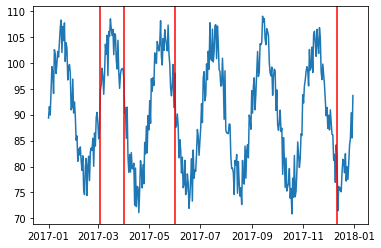

In [103]:
det.plot(changepoint);

In [104]:
test_prod.iloc[[110]]

,Variable_0,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Response,year,week,day
2017-04-21,23.922557,15.405197,1.647289,10.17807,21.206997,20.36105,10.015101,13.228119,29.106022,18.087705,81.129251,2017.0,16.0,5.0
